In [34]:
import pandas as pd
sample_submission = pd.read_csv('/kaggle/input/playground-series-s5e8/sample_submission.csv')

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
df=pd.read_csv("/kaggle/input/playground-series-s5e8/train.csv")
test_df=pd.read_csv("/kaggle/input/playground-series-s5e8/test.csv")
df=df.drop("id",axis=1)
test_df=test_df.drop("id",axis=1)
X = df.drop("y", axis=1)
y = df["y"]


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   age        750000 non-null  int64 
 1   job        750000 non-null  object
 2   marital    750000 non-null  object
 3   education  750000 non-null  object
 4   default    750000 non-null  object
 5   balance    750000 non-null  int64 
 6   housing    750000 non-null  object
 7   loan       750000 non-null  object
 8   contact    750000 non-null  object
 9   day        750000 non-null  int64 
 10  month      750000 non-null  object
 11  duration   750000 non-null  int64 
 12  campaign   750000 non-null  int64 
 13  pdays      750000 non-null  int64 
 14  previous   750000 non-null  int64 
 15  poutcome   750000 non-null  object
 16  y          750000 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 97.3+ MB


In [37]:
categorical_cols=[col for col in X.columns if X[col].dtype=="object" or X[col].nunique()<10]
numerical_cols=[col for col in X.columns if X[col].dtype=="int64" and col not in categorical_cols]
              

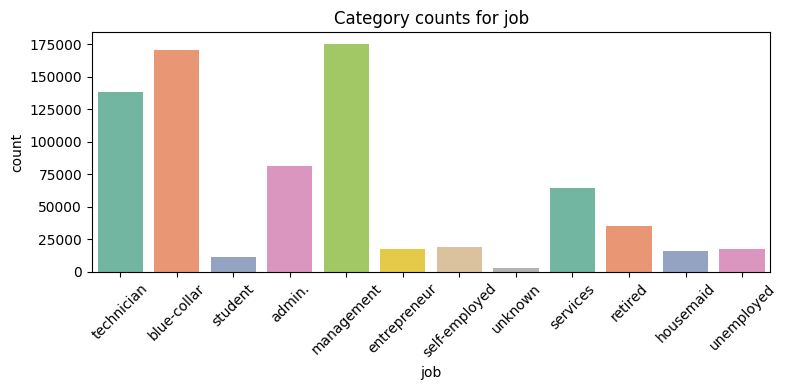

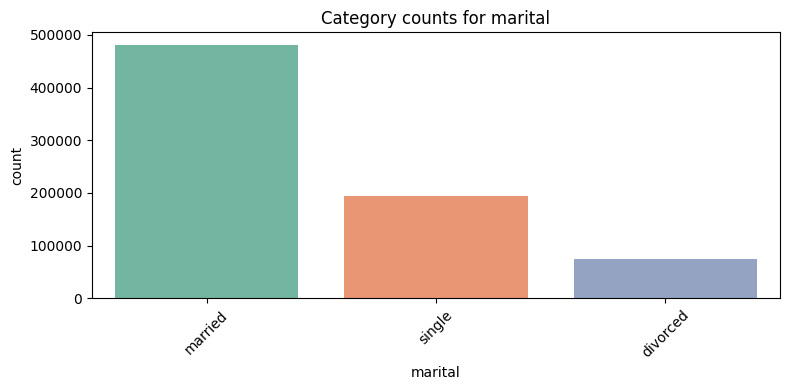

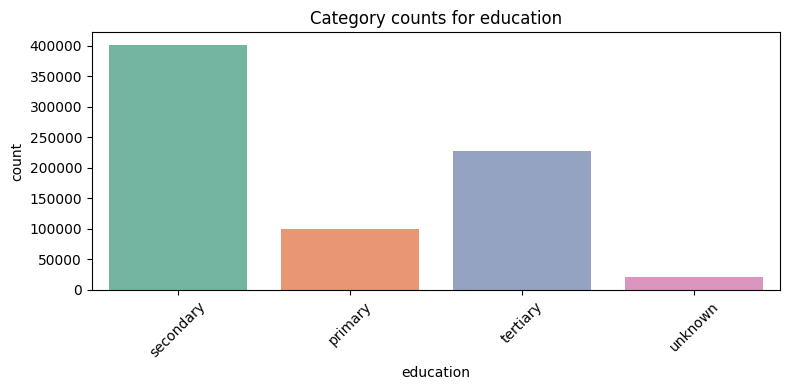

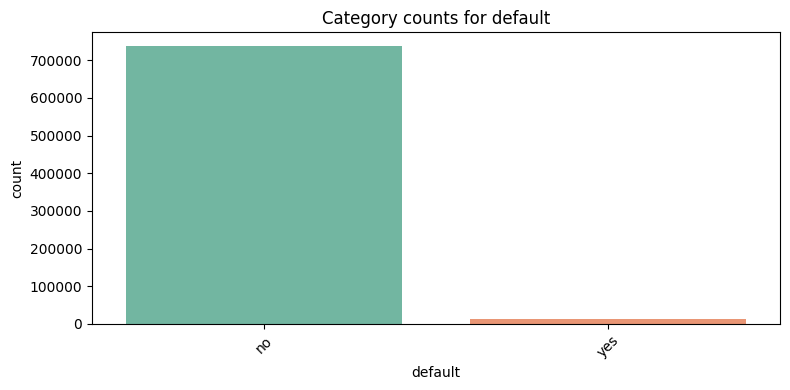

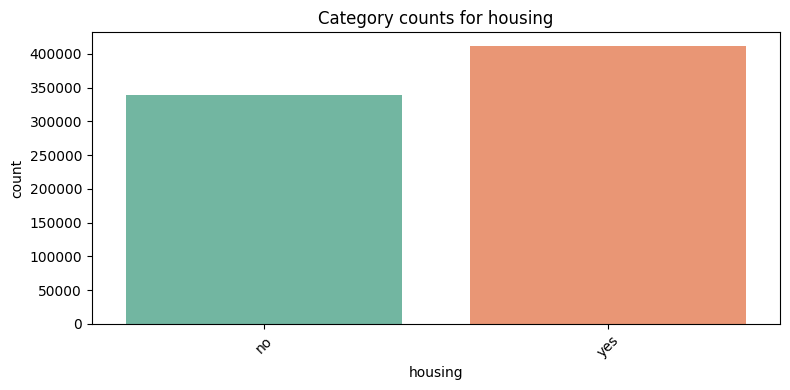

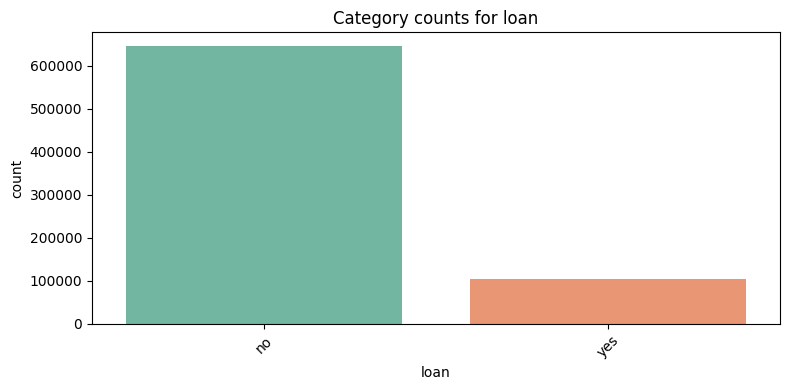

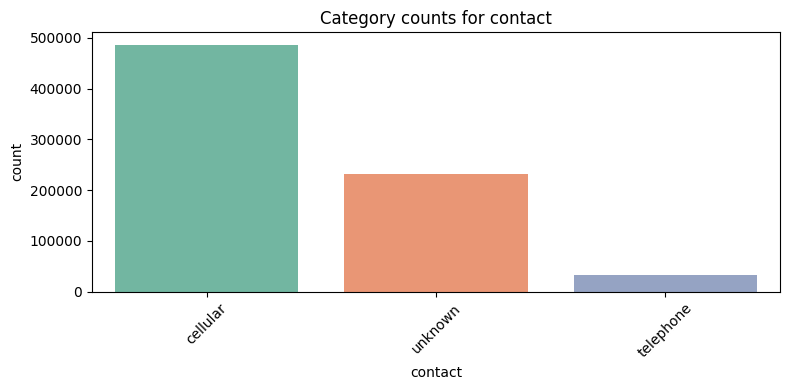

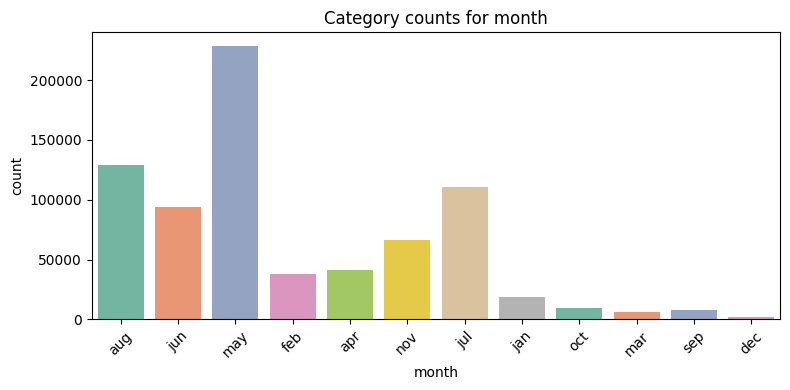

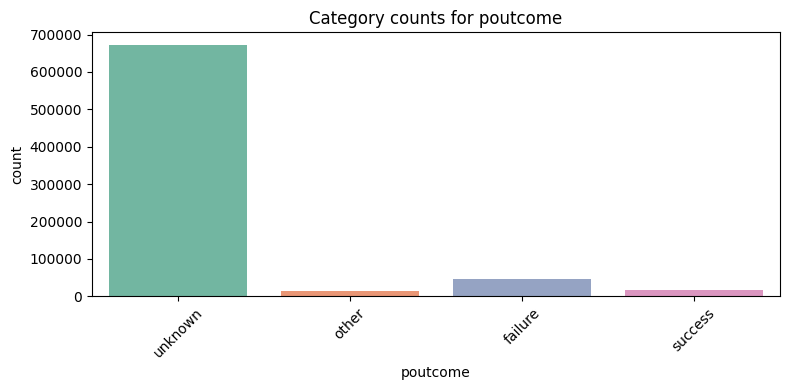

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_cols = [col for col in X.columns if X[col].dtype == 'object' or X[col].nunique() < 10]

for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=X, x=col, palette='Set2')
    plt.title(f'Category counts for {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [39]:
test_df.drop(['default','poutcome'],axis=1,errors='ignore',inplace=True)
df.drop(['default','poutcome'],axis=1,errors='ignore',inplace=True)
X=df.drop("y",axis=1)
y=df["y"]


In [40]:
month_counts = df['month'].value_counts()
rare_months = month_counts[month_counts < 20000].index  

df['month'] = df['month'].apply(lambda x: 'Other' if x in rare_months else x)
test_df['month'] = test_df['month'].apply(lambda x: 'Other' if x in rare_months else x)
test_df['month'].value_counts()

month
may      76009
aug      42874
jul      36828
jun      31195
nov      22037
Other    14663
apr      13878
feb      12516
Name: count, dtype: int64

In [41]:
job_counts = df['job'].value_counts()
rare_jobs = job_counts[job_counts < 25000].index

df['job'] = df['job'].apply(lambda x: 'Other' if x in rare_jobs else x)

test_df['job'] = test_df['job'].apply(lambda x: 'Other' if x in rare_jobs else x)
test_df['job'].value_counts()


job
management     58636
blue-collar    56970
technician     45936
Other          28526
admin.         27009
services       21312
retired        11611
Name: count, dtype: int64

In [42]:

df['education'] = df['education'].replace('unknown', 'missing')
test_df['education'] = test_df['education'].replace('unknown', 'missing')
df['education'].value_counts()
test_df['education'].value_counts()

education
secondary    133724
tertiary      76037
primary       32989
missing        7250
Name: count, dtype: int64

In [43]:
df['contact'] = df['contact'].replace('unknown', 'missing')
test_df['contact'] = test_df['contact'].replace('unknown', 'missing')



In [44]:
categorical_cols=[col for col in X.columns if X[col].dtype=="object" or X[col].nunique()<10]
numerical_cols=[col for col in X.columns if X[col].dtype=="int64" and col not in categorical_cols]

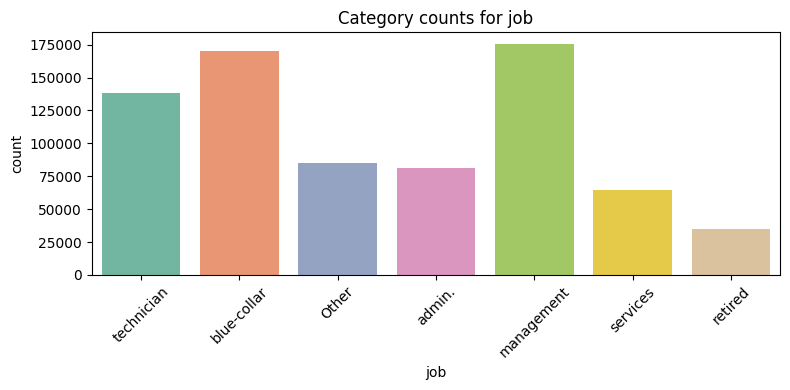

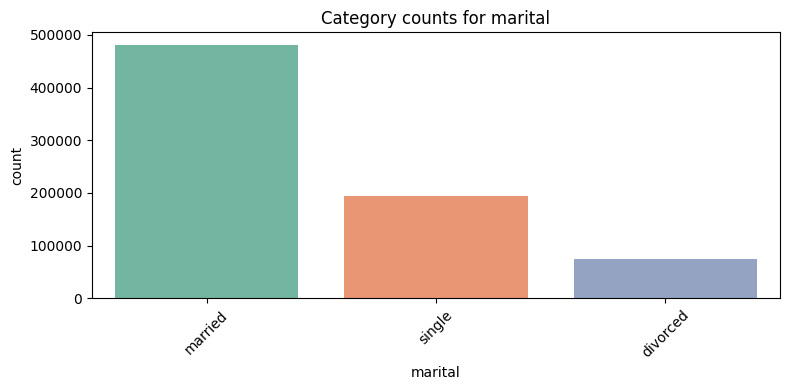

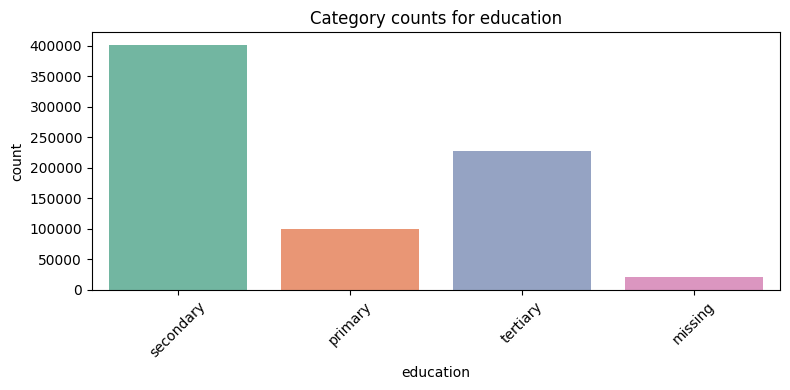

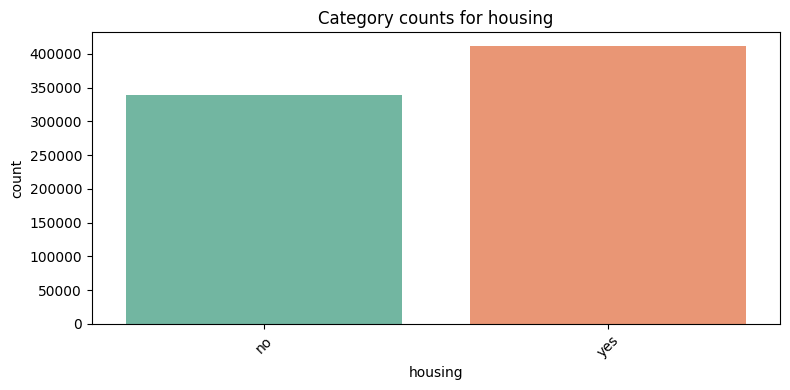

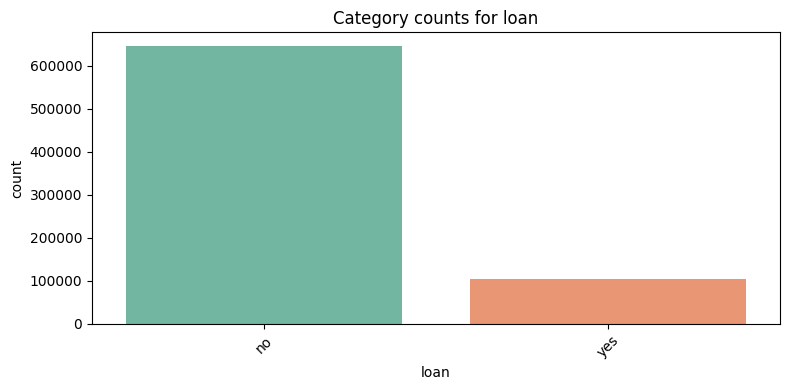

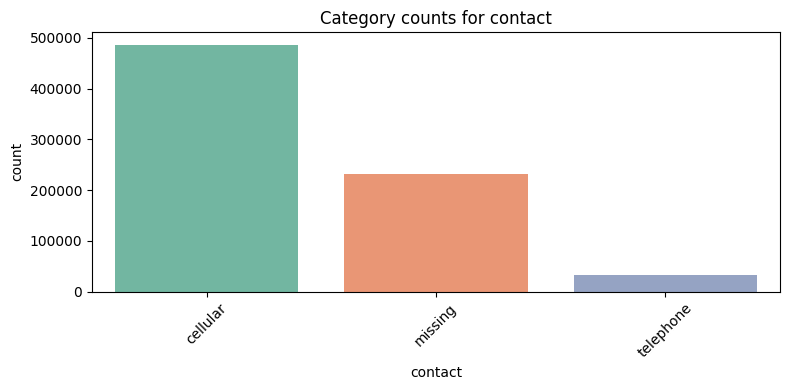

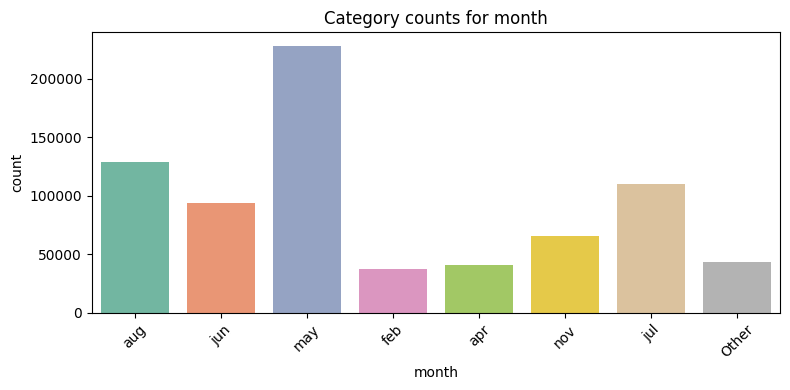

In [45]:
X = df.drop("y", axis=1)
y = df["y"]
import seaborn as sns
import matplotlib.pyplot as plt

categorical_cols = [col for col in X.columns if X[col].dtype == 'object' or X[col].nunique() < 10]

for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=X, x=col, palette='Set2')
    plt.title(f'Category counts for {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [46]:
df.isna().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
y            0
dtype: int64

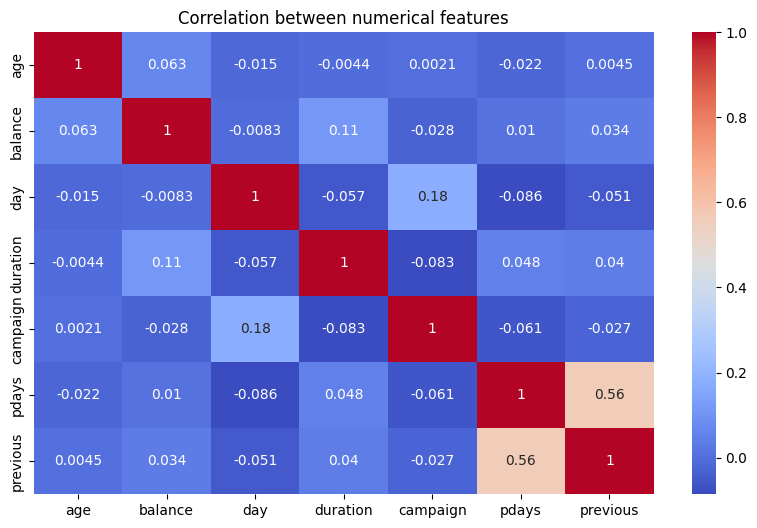

In [47]:
plt.figure(figsize=(10,6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between numerical features')
plt.show()

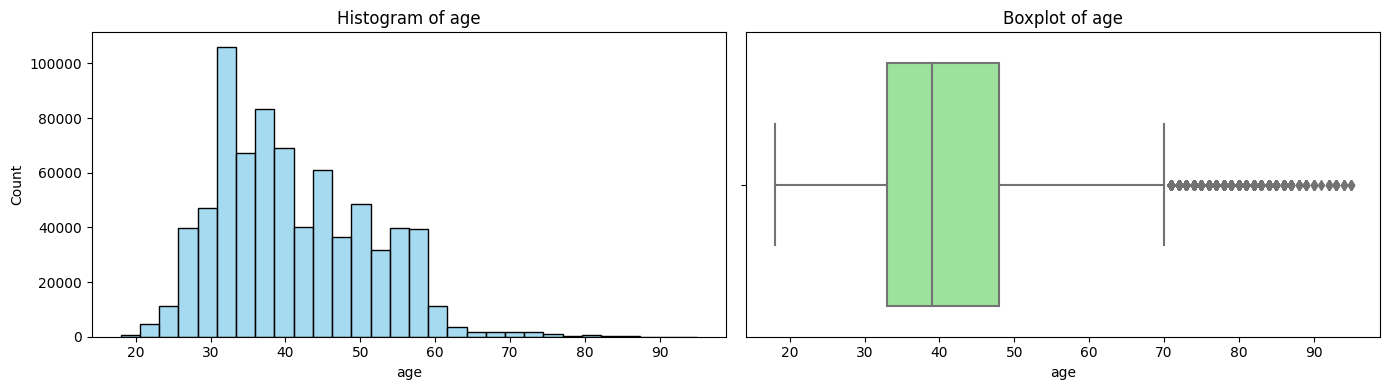

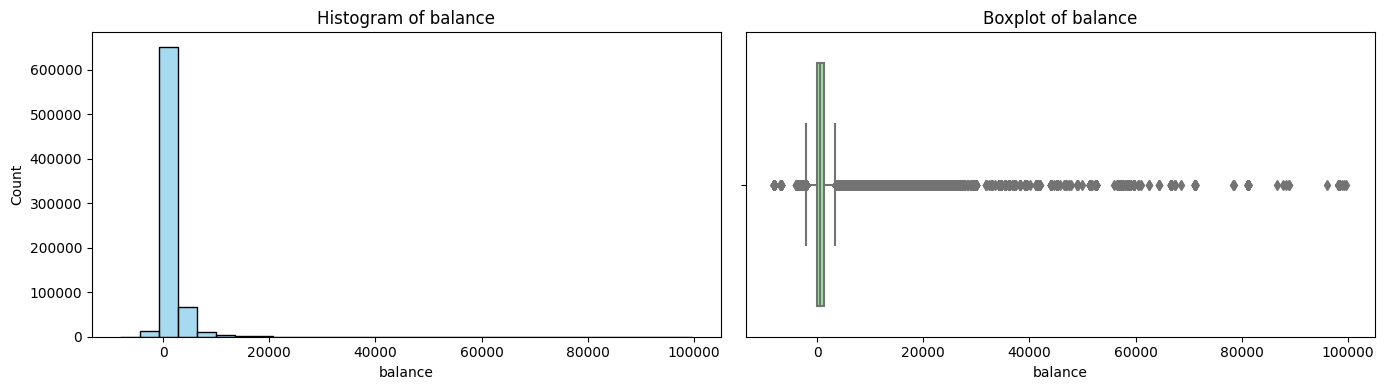

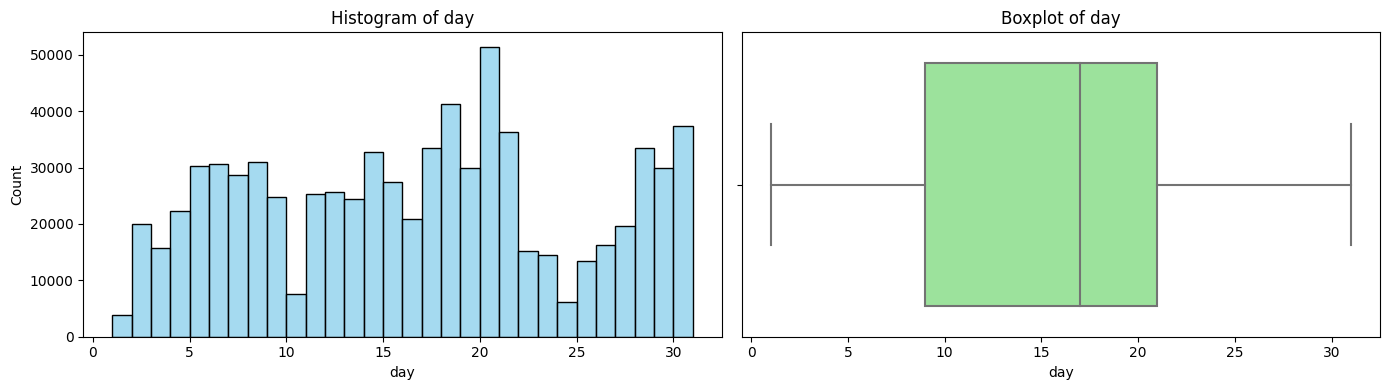

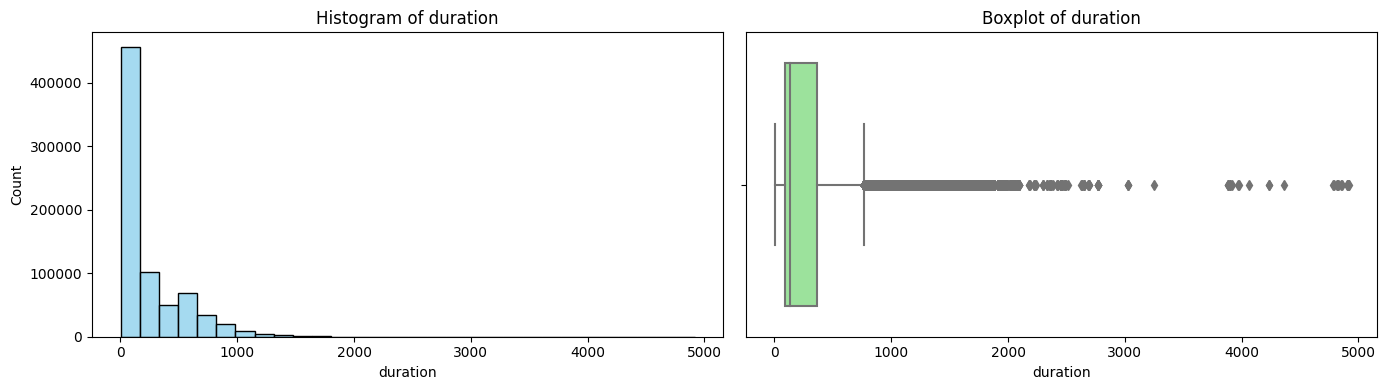

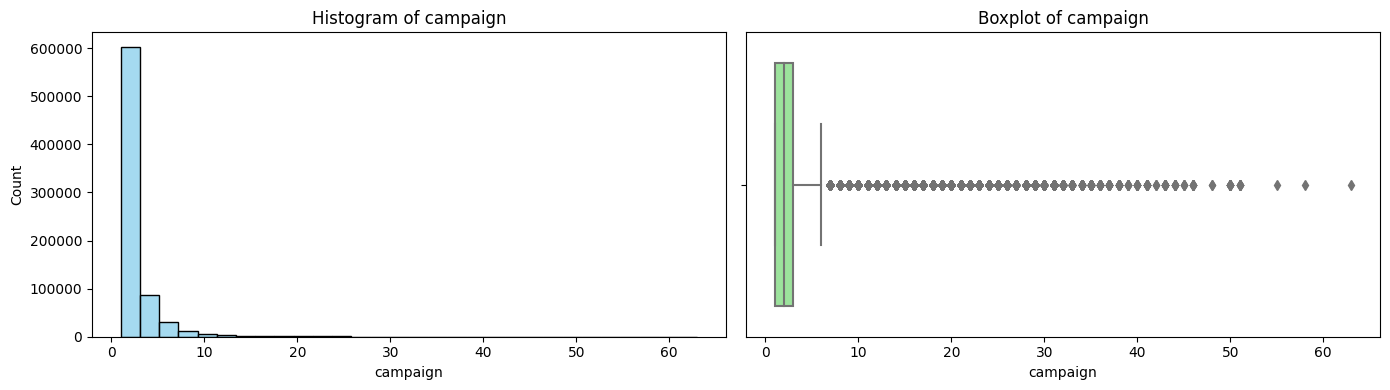

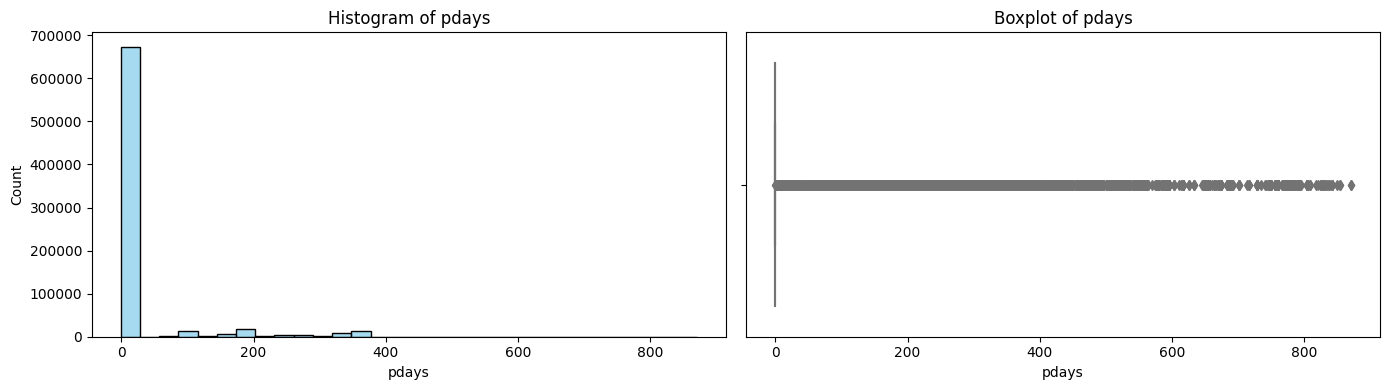

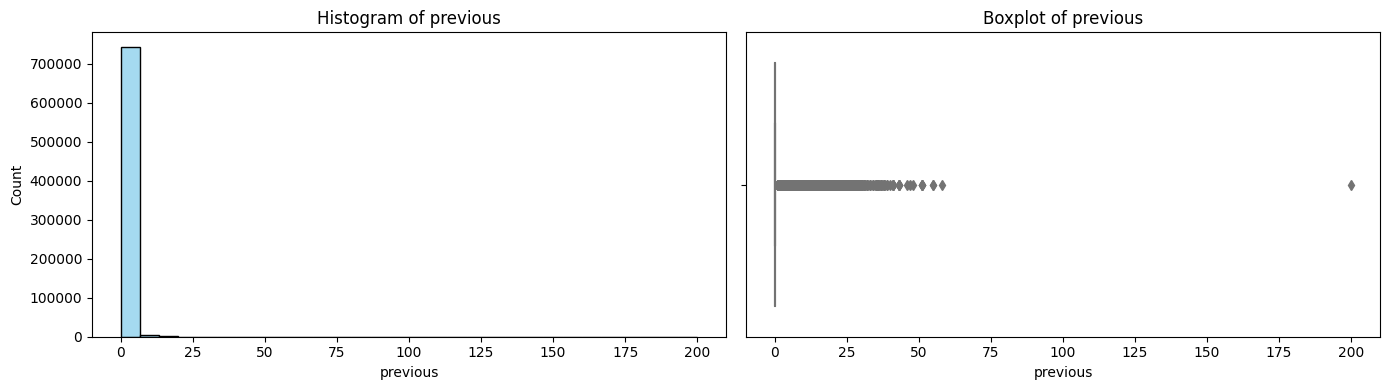

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(14,4))  
    sns.histplot(df[col], bins=30, color='skyblue', ax=axes[0])
    axes[0].set_title(f'Histogram of {col}')

    sns.boxplot(x=df[col], color='lightgreen', ax=axes[1])
    axes[1].set_title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()


In [49]:
df.drop(['previous','pdays'],axis=1,inplace=True)
test_df.drop(['previous','pdays'],axis=1,inplace=True)
df

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,y
0,42,technician,married,secondary,7,no,no,cellular,25,aug,117,3,0
1,38,blue-collar,married,secondary,514,no,no,missing,18,jun,185,1,0
2,36,blue-collar,married,secondary,602,yes,no,missing,14,may,111,2,0
3,27,Other,single,secondary,34,yes,no,missing,28,may,10,2,0
4,26,technician,married,secondary,889,yes,no,cellular,3,feb,902,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,29,services,single,secondary,1282,no,yes,missing,4,jul,1006,2,1
749996,69,retired,divorced,tertiary,631,no,no,cellular,19,aug,87,1,0
749997,50,blue-collar,married,secondary,217,yes,no,cellular,17,apr,113,1,0
749998,32,technician,married,secondary,-274,no,no,cellular,26,aug,108,6,0


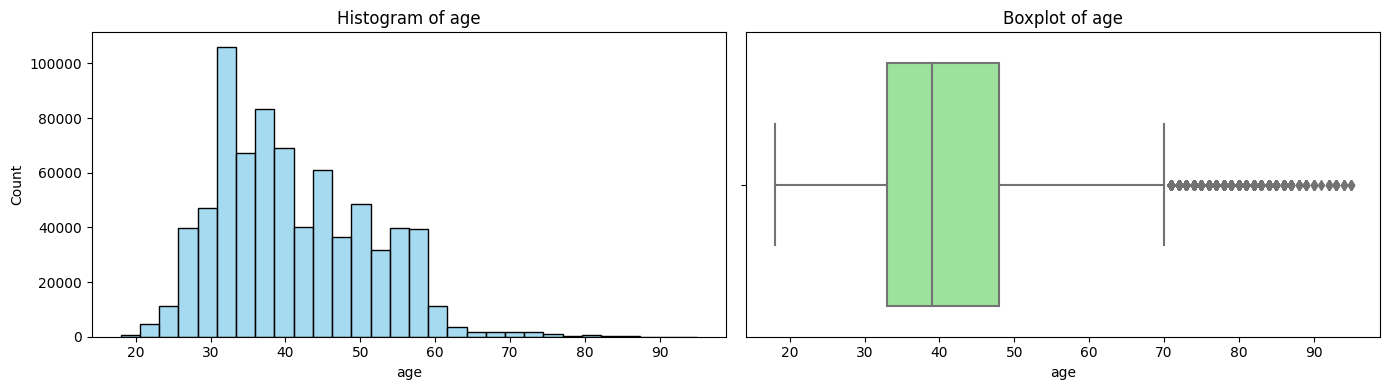

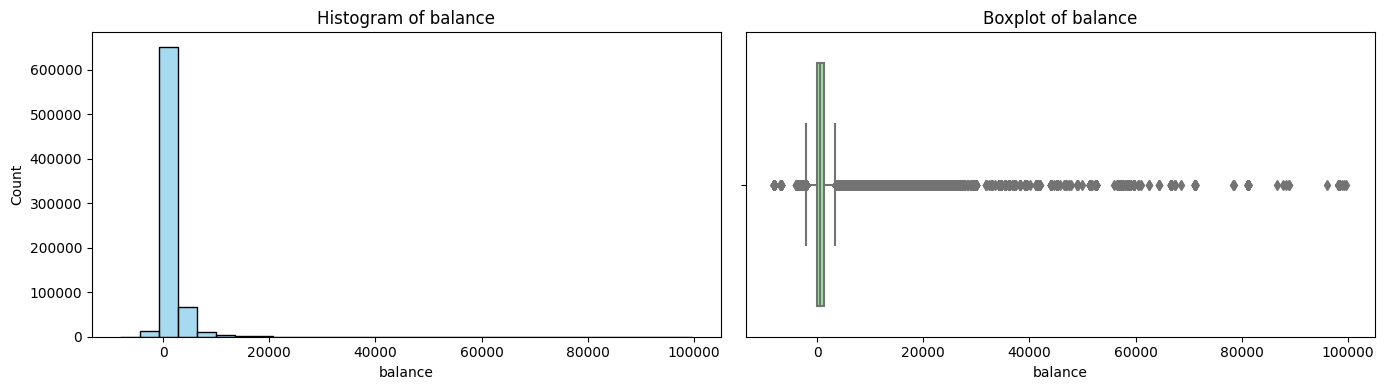

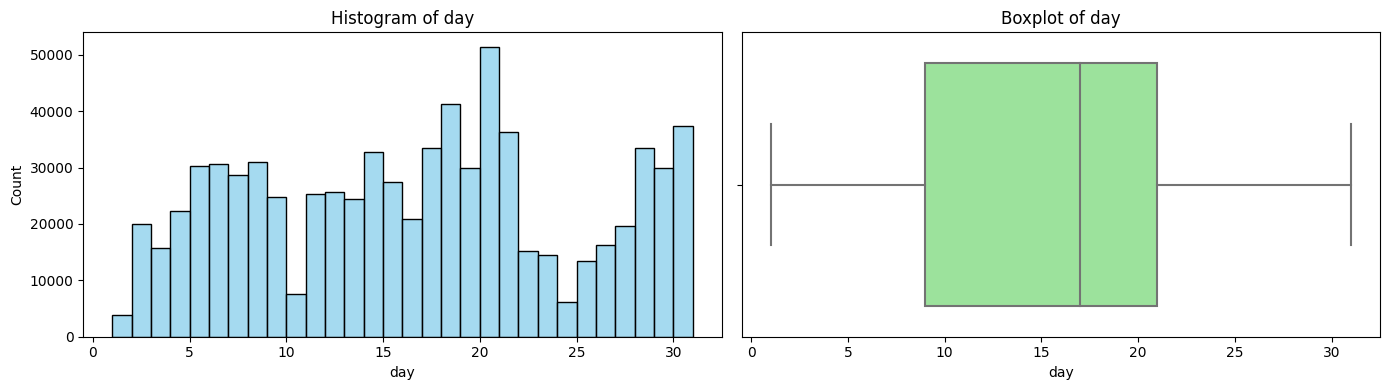

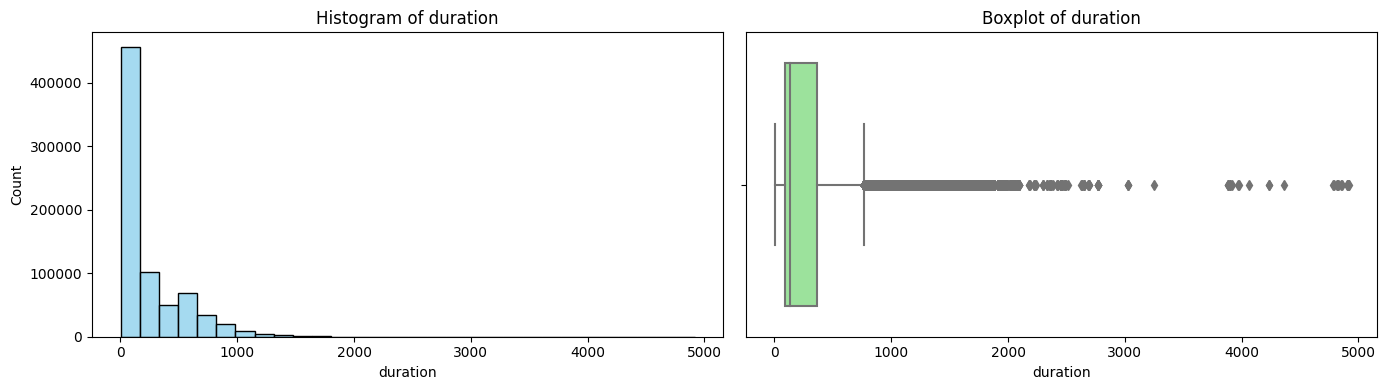

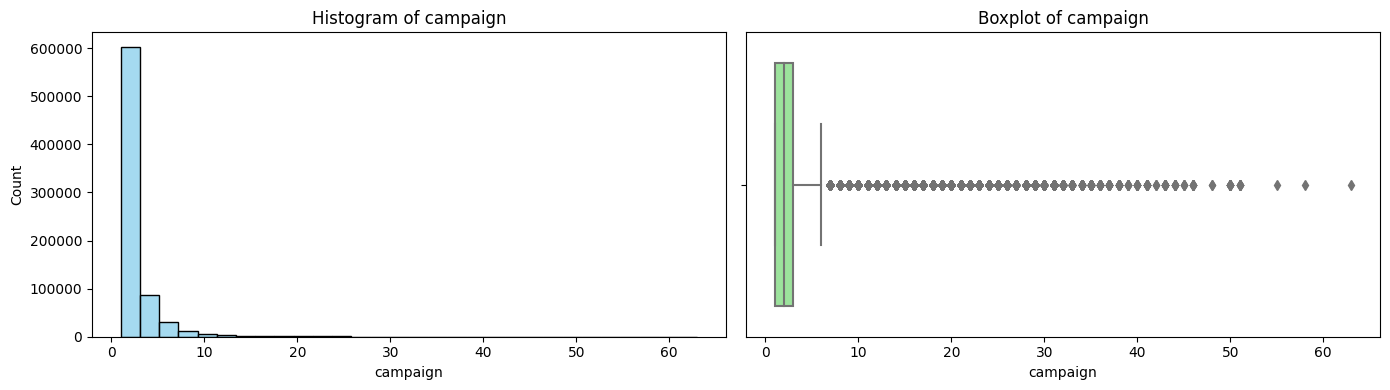

In [50]:
X=df.drop('y',axis=1)
y=df['y']
numerical_cols=[col for col in X.columns if X[col].dtype=="int64" and col not in categorical_cols]
for col in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(14,4))  
    sns.histplot(df[col], bins=30, color='skyblue', ax=axes[0])
    axes[0].set_title(f'Histogram of {col}')

    sns.boxplot(x=df[col], color='lightgreen', ax=axes[1])
    axes[1].set_title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()


In [51]:
age_70_90 = df[(df['age'] >= 70) & (df['age'] <= 90)]
print(len(age_70_90))

5759


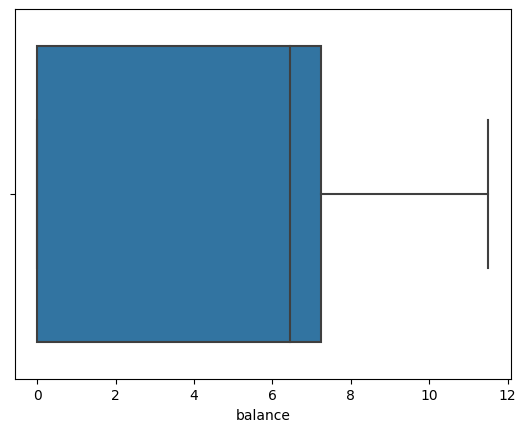

In [52]:

import numpy as np

# balance sütunundaki negatif değerleri 0 ile değiştir, sonra log1p uygula
df['balance'] = np.log1p(df['balance'].clip(lower=0))
test_df['balance'] = np.log1p(test_df['balance'].clip(lower=0))

# Sonucu görselleştir
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['balance'])
plt.show()


<Axes: xlabel='duration'>

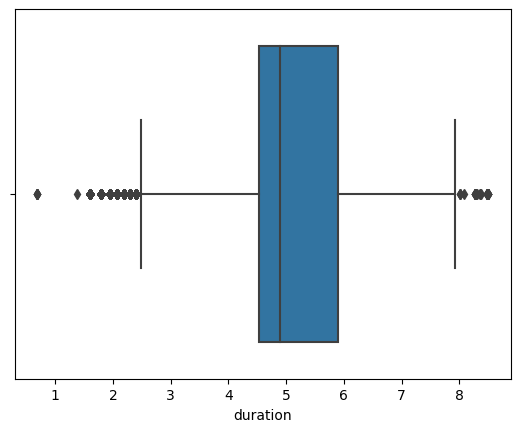

In [53]:

df['duration'] = np.log1p(df['duration'])
test_df['duration']=np.log1p(test_df['duration'])
sns.boxplot(x=df['duration'])

In [54]:


Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)
IQR = Q3 - Q1
k = 2.95 
lower_bound = Q1 - k * IQR
upper_bound = Q3 + k * IQR


outliers = df[(df['duration'] < lower_bound) | (df['duration'] > upper_bound)]

# Sonuçları yazdır
count = len(outliers)
ratio = count / len(df) * 100

print(f"duration sütununda aykırı değer sayısı: {count}")
print(f"Veri setindeki oranı: {ratio:.2f}%")
df['duration'] = df['duration'].clip(lower=lower_bound, upper=upper_bound)
test_df['duration'] = test_df['duration'].clip(lower=lower_bound, upper=upper_bound)


duration sütununda aykırı değer sayısı: 0
Veri setindeki oranı: 0.00%


<Axes: xlabel='duration'>

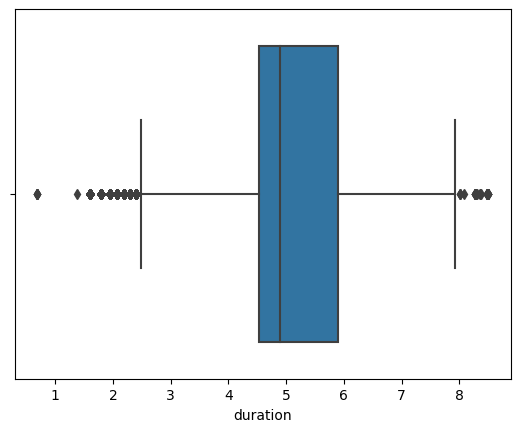

In [55]:
sns.boxplot(x=df['duration'])

In [56]:
Q1 = df['campaign'].quantile(0.25)
Q3 = df['campaign'].quantile(0.75)
IQR = Q3 - Q1

k = 1.5
lower_bound = Q1 - k * IQR
upper_bound = Q3 + k * IQR

# Aykırı değerler
outliers = df[(df['campaign'] < lower_bound) | (df['campaign'] > upper_bound)]

# Sayı ve oran
outlier_count = outliers.shape[0]
outlier_ratio = outlier_count / df.shape[0]

print(f"Aykırı değer sayısı: {outlier_count}")
print(f"Aykırı değer oranı: {outlier_ratio:.2%}")  # Yüzde olarak gösterir


Aykırı değer sayısı: 40686
Aykırı değer oranı: 5.42%


In [57]:
df['campaign'] = df['campaign'].clip(lower=lower_bound, upper=upper_bound)
Q1 = df['campaign'].quantile(0.25)
Q3 = df['campaign'].quantile(0.75)
IQR = Q3 - Q1

k = 1.5
lower_bound = Q1 - k * IQR
upper_bound = Q3 + k * IQR

# Aykırı değerleri bul
outliers = df[(df['campaign'] < lower_bound) | (df['campaign'] > upper_bound)]

outlier_count = outliers.shape[0]
outlier_ratio = outlier_count / df.shape[0]

print(f"Aykırı değer sayısı: {outlier_count}")
print(f"Aykırı değer oranı: {outlier_ratio:.2%}")

Aykırı değer sayısı: 0
Aykırı değer oranı: 0.00%


In [58]:
df['campaign'] = df['campaign'].clip(lower=lower_bound, upper=upper_bound)
test_df['campaign'] = test_df['campaign'].clip(lower=lower_bound, upper=upper_bound)

In [59]:
df

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,y
0,42,technician,married,secondary,2.079442,no,no,cellular,25,aug,4.770685,3,0
1,38,blue-collar,married,secondary,6.244167,no,no,missing,18,jun,5.225747,1,0
2,36,blue-collar,married,secondary,6.401917,yes,no,missing,14,may,4.718499,2,0
3,27,Other,single,secondary,3.555348,yes,no,missing,28,may,2.397895,2,0
4,26,technician,married,secondary,6.791221,yes,no,cellular,3,feb,6.805723,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,29,services,single,secondary,7.156956,no,yes,missing,4,jul,6.914731,2,1
749996,69,retired,divorced,tertiary,6.448889,no,no,cellular,19,aug,4.477337,1,0
749997,50,blue-collar,married,secondary,5.384495,yes,no,cellular,17,apr,4.736198,1,0
749998,32,technician,married,secondary,0.000000,no,no,cellular,26,aug,4.691348,6,0


In [60]:
df.isna().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 13 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   age        750000 non-null  int64  
 1   job        750000 non-null  object 
 2   marital    750000 non-null  object 
 3   education  750000 non-null  object 
 4   balance    750000 non-null  float64
 5   housing    750000 non-null  object 
 6   loan       750000 non-null  object 
 7   contact    750000 non-null  object 
 8   day        750000 non-null  int64  
 9   month      750000 non-null  object 
 10  duration   750000 non-null  float64
 11  campaign   750000 non-null  int64  
 12  y          750000 non-null  int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 74.4+ MB


In [62]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

categorical_cols

['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month']

In [63]:
df.head()
test_df.head()


,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign
0,32,blue-collar,married,secondary,7.242798,yes,no,missing,21,may,5.416100,1
1,44,management,married,tertiary,3.178054,yes,no,cellular,3,apr,6.375025,2
2,36,Other,married,primary,3.850148,yes,yes,cellular,13,may,4.718499,2
3,58,blue-collar,married,secondary,0.000000,yes,yes,missing,29,may,4.836282,1
4,28,technician,single,secondary,7.576097,yes,no,cellular,22,jul,5.204007,1


In [64]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings("ignore")

train = pd.read_csv("/kaggle/input/playground-series-s5e8/train.csv")
test  = pd.read_csv("/kaggle/input/playground-series-s5e8/test.csv")

if train['y'].dtype == 'O':
    y = train['y'].map({'no':0, 'yes':1}).astype(int)
else:
    y = train['y'].astype(int)

X_raw  = train.drop(columns=['y', 'id'], errors='ignore').copy()
test_raw = test.drop(columns=['id'], errors='ignore').copy()

def feature_engineering(df: pd.DataFrame):
    df = df.copy()
    for c in df.columns:
        if df[c].dtype == 'O':
            df[c] = df[c].astype(str)

    # Log dönüşümleri
    for col in ['balance', 'duration', 'pdays', 'campaign', 'previous']:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
            df[col + '_log1p'] = np.log1p(df[col].clip(lower=0))

    if 'pdays' in df.columns:
        df['pdays_is_minus1'] = (df['pdays'] == -1).astype(int)

    # duration flag
    if 'duration' in df.columns:
        df['is_long_duration'] = (df['duration'] > 500).astype(int)

    return df

X_fe = feature_engineering(X_raw)
test_fe = feature_engineering(test_raw)

cat_cols = X_fe.select_dtypes(include=['object']).columns.tolist()
X_lgb = X_fe.copy()
test_lgb = test_fe.copy()

if cat_cols:
    enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    enc.fit(pd.concat([X_lgb[cat_cols], test_lgb[cat_cols]], axis=0).astype(str))
    X_lgb[cat_cols] = enc.transform(X_lgb[cat_cols].astype(str))
    test_lgb[cat_cols] = enc.transform(test_lgb[cat_cols].astype(str))


skf = StratifiedKFold(n_splits=8, shuffle=True, random_state=42)

oof = np.zeros(len(X_lgb))
pred_test = np.zeros(len(test_lgb))

lgb_params = dict(
    objective='binary',
    learning_rate=0.05,      
    num_leaves=50,            
    max_depth=-1,             
    feature_fraction=0.8,
    bagging_fraction=0.8,
    bagging_freq=5,
    n_estimators=10000,
    early_stopping_rounds=200,
    random_state=42,
    verbose=-1
)

for fold, (tr_idx, va_idx) in enumerate(skf.split(X_lgb, y), 1):
    Xtr, Xva = X_lgb.iloc[tr_idx], X_lgb.iloc[va_idx]
    ytr, yva = y.iloc[tr_idx], y.iloc[va_idx]

    model = lgb.LGBMClassifier(**lgb_params)
    model.fit(
        Xtr, ytr,
        eval_set=[(Xva, yva)],
        eval_metric='auc',
        callbacks=[lgb.early_stopping(stopping_rounds=100, verbose=False)]
    )
    oof[va_idx] = model.predict_proba(Xva)[:,1]
    pred_test += model.predict_proba(test_lgb)[:,1] / skf.n_splits

    auc = roc_auc_score(yva, oof[va_idx])
    print(f"[Fold {fold}] AUC={auc:.5f}")

print("OOF AUC:", roc_auc_score(y, oof))


submission = pd.DataFrame({
    "id": test["id"],
    "y": pred_test
})
submission.to_csv("submission.csv", index=False)


[Fold 1] AUC=0.97075
[Fold 2] AUC=0.96899
[Fold 3] AUC=0.96896
[Fold 4] AUC=0.96864
[Fold 5] AUC=0.96980
[Fold 6] AUC=0.97048
[Fold 7] AUC=0.96912
[Fold 8] AUC=0.96929
OOF AUC: 0.9695002104900375


In [65]:
X,y

(        age          job   marital  education  balance housing loan   contact  \
 0        42   technician   married  secondary        7      no   no  cellular   
 1        38  blue-collar   married  secondary      514      no   no   missing   
 2        36  blue-collar   married  secondary      602     yes   no   missing   
 3        27        Other    single  secondary       34     yes   no   missing   
 4        26   technician   married  secondary      889     yes   no  cellular   
 ...     ...          ...       ...        ...      ...     ...  ...       ...   
 749995   29     services    single  secondary     1282      no  yes   missing   
 749996   69      retired  divorced   tertiary      631      no   no  cellular   
 749997   50  blue-collar   married  secondary      217     yes   no  cellular   
 749998   32   technician   married  secondary     -274      no   no  cellular   
 749999   42   technician   married  secondary     1559      no   no  cellular   
 
         day m

In [66]:
print((df['y']==1).sum())

90488
